## Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/PC/KNN/gene_expression.csv")
data.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
data.shape

(3000, 3)

In [4]:
data.dtypes

Gene One          float64
Gene Two          float64
Cancer Present      int64
dtype: object

In [5]:
data.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

## Exploratory Data Analysis 

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [8]:
data.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

.. There are no null values in the dataset.

## Vizualisation

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

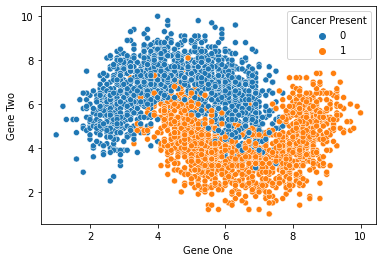

In [9]:
sns.scatterplot(x='Gene One', y='Gene Two', hue="Cancer Present",data=data)

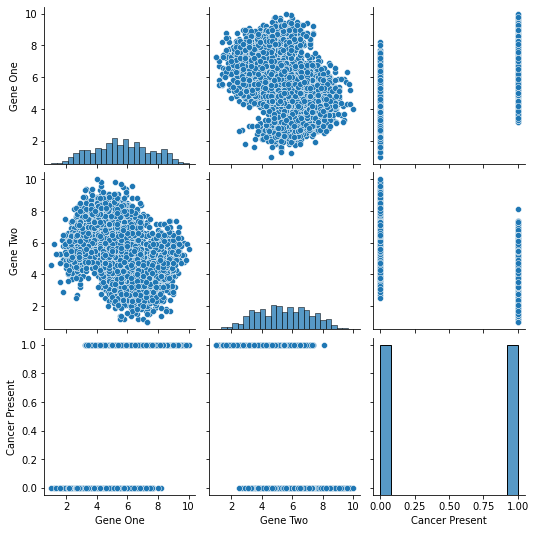

In [10]:
sns.pairplot(data)
plt.show()

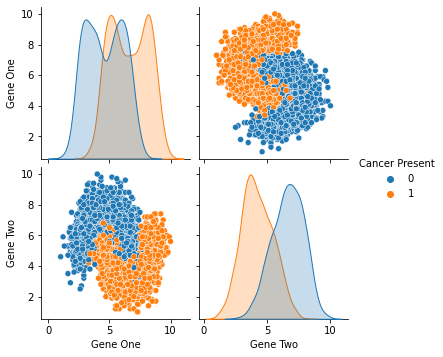

In [11]:
sns.pairplot(data, hue='Cancer Present')
plt.show()

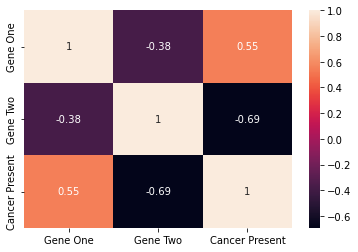

In [12]:
sns.heatmap(data.corr(), annot=True)
plt.show()

<AxesSubplot:>

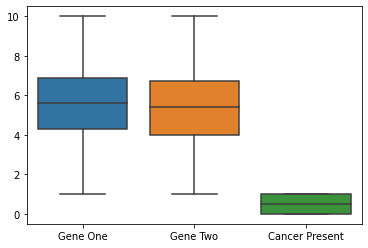

In [13]:
sns.boxplot(data=data)

.. There are no outliers present in the dataset.

## Create X & Y 

In [14]:
x = data.iloc[:,[0,1]]
y = data.iloc[:,2]

In [15]:
x

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


In [16]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Cancer Present, Length: 3000, dtype: int64

## Splitting the data

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [18]:
x_train

,Gene One,Gene Two
2387,5.4,7.0
517,5.7,6.0
32,3.3,6.5
2152,6.2,6.5
2974,7.0,4.6
...,...,...
1044,7.8,4.1
2694,5.2,7.2
2962,6.0,6.6
116,5.9,5.4


In [19]:
y_train

2387    1
517     0
32      0
2152    0
2974    1
       ..
1044    1
2694    0
2962    0
116     0
2651    1
Name: Cancer Present, Length: 2100, dtype: int64

In [20]:
x_test

,Gene One,Gene Two
2583,5.6,3.5
586,7.8,3.4
401,8.8,6.2
1320,7.7,5.0
103,4.3,5.5
...,...,...
1302,5.6,6.4
2619,3.2,7.5
2247,5.0,7.4
200,2.6,6.0


In [21]:
y_test

2583    1
586     1
401     1
1320    0
103     1
       ..
1302    0
2619    0
2247    0
200     0
2329    1
Name: Cancer Present, Length: 900, dtype: int64

## Scaling the data 

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled_train = sc.fit_transform(x_train)
x_scaled_test = sc.transform(x_test)

## KNN modelling with default parameter

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_scaled_train, y_train)


KNeighborsClassifier()

## Prediction 

In [24]:
y_pred_train = knn_model.predict(x_scaled_train)
y_pred_test = knn_model.predict(x_scaled_test)

## Evaluation 

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.9177777777777778

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.9480952380952381

## Choosing best K value 

In [27]:
test_acc = []
for k in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_scaled_train, y_train)
    y_pred_test = knn_model.predict(x_scaled_test)
    test_acc_score = accuracy_score(y_test, y_pred_test)
    test_acc.append(test_acc_score)
test_acc    

[0.9022222222222223,
 0.9211111111111111,
 0.9177777777777778,
 0.93,
 0.9344444444444444,
 0.9322222222222222,
 0.9355555555555556,
 0.9344444444444444,
 0.9355555555555556,
 0.9333333333333333,
 0.9355555555555556,
 0.9344444444444444,
 0.9366666666666666,
 0.9344444444444444,
 0.9355555555555556]

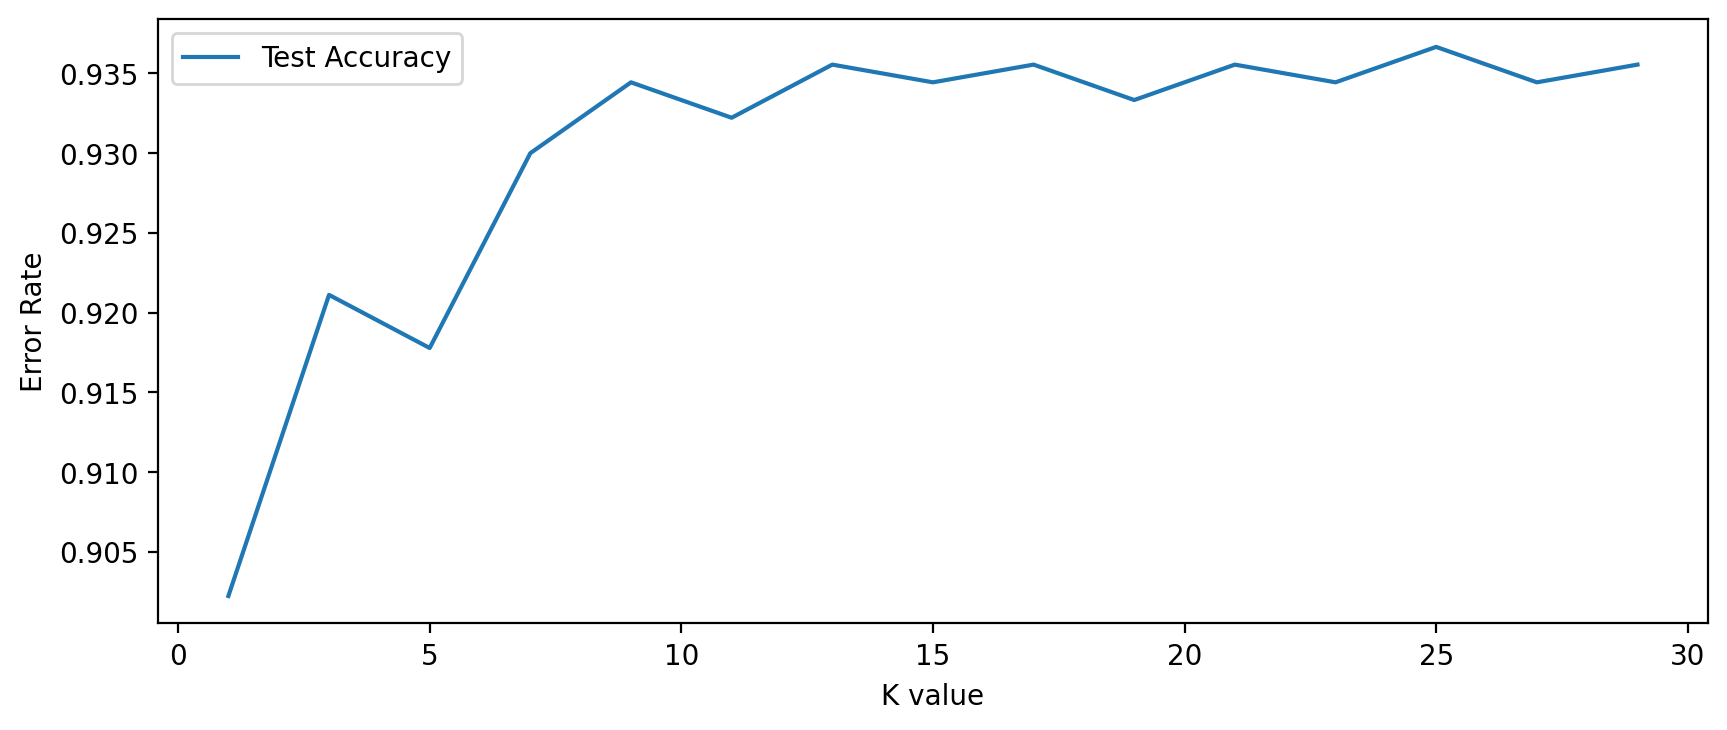

In [28]:
plt.figure(figsize=(10,4), dpi=200)
plt.plot(range(1,30,2), test_acc, label='Test Accuracy')
plt.ylabel("Error Rate")
plt.xlabel("K value")
plt.legend()
plt.show()

## Final Model 

In [29]:
knn = KNeighborsClassifier(n_neighbors=13, p=2)
knn.fit(x_scaled_train, y_train)
y_pred = knn.predict(x_scaled_test)
accuracy_score(y_test, y_pred)


0.9355555555555556

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[405,  29],
       [ 29, 437]], dtype=int64)

## Save Model


In [31]:
import pickle
filename = "knn.pkl"
pickle.dump(knn, open(filename, 'wb'))